In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Brain tumor/Post-contrast T1-weighted (T1w)/Data/BraTS2019_Features_T1ce.csv')
df_2020 = pd.read_csv('/content/drive/MyDrive/Brain tumor/Post-contrast T1-weighted (T1w)/Data/BraTS2020_Features_T1ce.csv')

In [ ]:
combined_df = pd.concat([df_2019,df_2020], ignore_index=True)
combined_df.head(5)

,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,diagnostics_Image-original_Dimensionality,diagnostics_Image-original_Spacing,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,Diagnosis
0,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1c3c014952838422f89931d58b0ab601c3ea0734,3D,"(1.0, 1.0, 1.0)",...,0.002297,6.040357,0.150024,1.129347e+04,2.749485,0.000503,773.714023,0.030531,0.397391,HGG
1,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},9e6bd4d7ed40b8abaa56b48b2d849d56e512d733,3D,"(1.0, 1.0, 1.0)",...,0.140254,3.771115,0.004974,8.223931e+06,111.916006,0.001187,0.127932,0.000578,0.002476,HGG
2,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},a990032b6591d767a01ef9ddc7a6b1a02f2d83ff,3D,"(1.0, 1.0, 1.0)",...,0.005979,6.267369,0.132429,1.177617e+04,3.698627,0.000321,809.679295,0.011989,0.380369,HGG
3,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},319ccd6f42025b85d87cb7a9b5538f789630fbe8,3D,"(1.0, 1.0, 1.0)",...,0.010434,4.814617,0.464891,8.471978e+00,0.389017,0.018053,149.557666,0.114842,1.509092,HGG
4,v3.0.1,1.23.5,2.3.0,1.4.1,3.10.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},e60391482445dc4332da7e9e1d89afea0c61c553,3D,"(1.0, 1.0, 1.0)",...,0.006344,5.829287,0.219866,2.358347e+03,3.188879,0.000490,1424.423719,0.018588,0.966786,HGG


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 130 entries, diagnostics_Versions_PyRadiomics to Diagnosis
dtypes: float64(110), int64(2), object(18)
memory usage: 713.1+ KB


In [ ]:
for column in combined_df.columns:
  print(column)

diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameterSlice
original_shape_

In [ ]:
combined_df.isnull().sum()

diagnostics_Versions_PyRadiomics    0
diagnostics_Versions_Numpy          0
diagnostics_Versions_SimpleITK      0
diagnostics_Versions_PyWavelet      0
diagnostics_Versions_Python         0
                                   ..
original_ngtdm_Coarseness           0
original_ngtdm_Complexity           0
original_ngtdm_Contrast             0
original_ngtdm_Strength             0
Diagnosis                           0
Length: 130, dtype: int64

In [ ]:
combined_df.drop(columns=["diagnostics_Versions_PyRadiomics",
                          "diagnostics_Versions_Numpy",
                          "diagnostics_Versions_SimpleITK",
                          "diagnostics_Versions_PyWavelet",
                          "diagnostics_Versions_Python",
                          "diagnostics_Configuration_Settings",
                          "diagnostics_Configuration_EnabledImageTypes",
                          "diagnostics_Image-original_Hash",
                          "diagnostics_Image-original_Dimensionality",
                          "diagnostics_Image-original_Spacing",
                          "diagnostics_Image-original_Size",
                          "diagnostics_Mask-original_Hash",
                          "diagnostics_Mask-original_Spacing",
                          "diagnostics_Mask-original_Size",
                          "diagnostics_Mask-original_BoundingBox",
                          "diagnostics_Mask-original_CenterOfMassIndex",
                          "diagnostics_Mask-original_CenterOfMass"], inplace=True, axis=1)

In [ ]:
combined_df.info()
data = combined_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 619.9+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Columns: 113 entries, diagnostics_Image-original_Mean to Diagnosis
dtypes: float64(110), int64(2), object(1)
memory usage: 619.9+ KB


In [ ]:
le=LabelEncoder()
y=le.fit_transform(data['Diagnosis'])

In [ ]:
# Split data into features (X) and labels (y)
X = data.drop('Diagnosis', axis=1).values
#y = data['Diagnosis'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [ ]:
class RGGN(tf.keras.Model):
    def __init__(self, num_classes):
        super(RGGN, self).__init__()
        self.num_classes = num_classes
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense4 = tf.keras.layers.Dense(num_classes, activation='sigmoid')

    def call(self, inputs, training=False):
        x, adj_matrix = inputs
        h = self.dense1(x)
        h = tf.matmul(adj_matrix, h)  # Aggregation step using adjacency matrix
        return self.dense4(h)

# Create the RGGN model
num_classes = 2  # Two classes: 0 and 1
model = RGGN(num_classes)

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

# Training loop
epochs = 1000
for epoch in range(epochs):
    for batch_x, batch_y in train_dataset:
        inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))  # Identity matrix as adjacency matrix
        loss = train_step(inputs, batch_y)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.numpy()}")

Epoch 1/1000, Loss: 0.6403940320014954
Epoch 2/1000, Loss: 0.4985317587852478
Epoch 3/1000, Loss: 0.43312573432922363
Epoch 4/1000, Loss: 0.38900262117385864
Epoch 5/1000, Loss: 0.3527110815048218
Epoch 6/1000, Loss: 0.3219440281391144
Epoch 7/1000, Loss: 0.2947039306163788
Epoch 8/1000, Loss: 0.2698553204536438
Epoch 9/1000, Loss: 0.2501983046531677
Epoch 10/1000, Loss: 0.2357025295495987
Epoch 11/1000, Loss: 0.22307859361171722
Epoch 12/1000, Loss: 0.21199393272399902
Epoch 13/1000, Loss: 0.20245903730392456
Epoch 14/1000, Loss: 0.19387558102607727
Epoch 15/1000, Loss: 0.186343714594841
Epoch 16/1000, Loss: 0.1792224645614624
Epoch 17/1000, Loss: 0.17192649841308594
Epoch 18/1000, Loss: 0.165088951587677
Epoch 19/1000, Loss: 0.15864765644073486
Epoch 20/1000, Loss: 0.15223602950572968
Epoch 21/1000, Loss: 0.14636391401290894
Epoch 22/1000, Loss: 0.14082854986190796
Epoch 23/1000, Loss: 0.13602019846439362
Epoch 24/1000, Loss: 0.1310197114944458
Epoch 25/1000, Loss: 0.1263850629329681

In [ ]:
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
for batch_x, batch_y in test_dataset:
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))
    predictions = model(inputs, training=False)
    test_accuracy(batch_y, predictions)

print(f'Test Accuracy: {test_accuracy.result():.2f}')

Test Accuracy: 0.97


In [ ]:
y_pred = []
for batch_x, _ in test_dataset:
    inputs = (batch_x, tf.linalg.diag(tf.ones(batch_x.shape[0])))
    predictions = model(inputs, training=False)
    y_pred.extend(predictions.numpy().argmax(axis=1))

y_test = np.array(y_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')

Confusion Matrix:
[[109   2]
 [  2  28]]


In [ ]:
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.2f}")

Specificity: 0.98


In [ ]:
auc_score = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {auc_score:.2f}')

AUC Score: 0.96


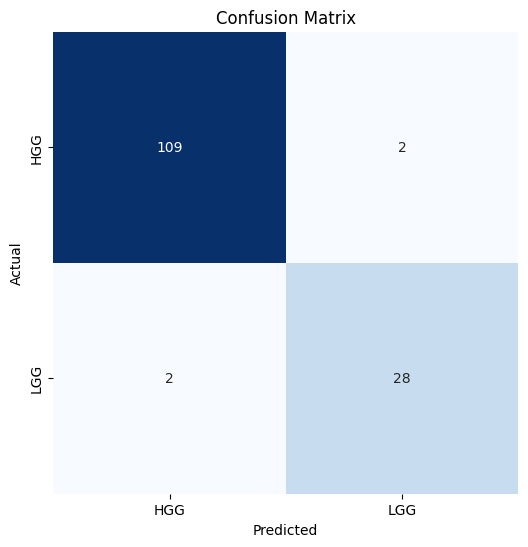

In [ ]:
# Assuming you have already calculated the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['HGG', 'LGG'],
            yticklabels=['HGG', 'LGG'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       111
           1       0.93      0.93      0.93        30

    accuracy                           0.97       141
   macro avg       0.96      0.96      0.96       141
weighted avg       0.97      0.97      0.97       141



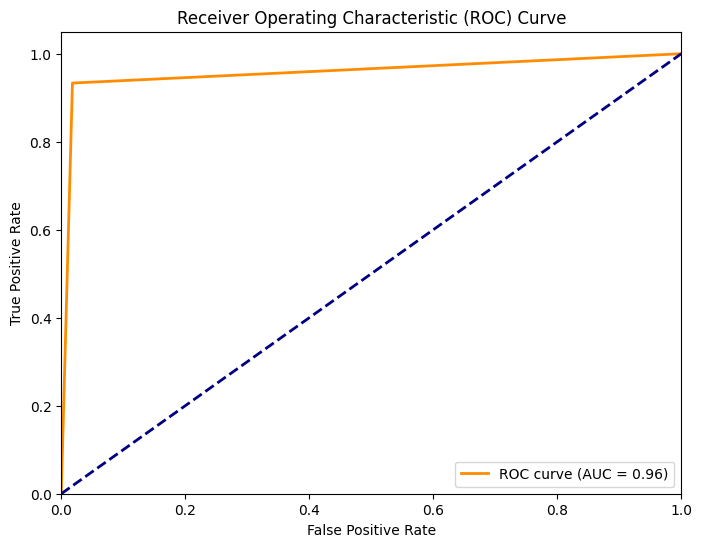

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred)

# Create and display the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()